<a href="https://colab.research.google.com/github/sanjibkdas/CompuerVision_UNet/blob/main/Questions_AIML_Online_Project_1_Advanced_Computer_Vision_Face_Mask_Prediction_using_U_Net_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
#### Add your code here ####
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [2]:
import numpy as np
data = np.load('/content/drive/My Drive/Colab Notebooks/images.npy', allow_pickle=True)

#### Add your code here ####

### Check one sample from the loaded "images.npy" file  (3 marks)
- Hint: print data[10][1] 

In [3]:
print(data.shape)
#### Add your code here ####
##print(data[1])
print(data[1][1])
a = data[1][1]
print(type(a))
print(len(a))
print('Image height is ---->', a[0].get('imageHeight'))
print('Image width is ---->', a[0].get('imageWidth'))

(409, 2)
[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.7053087757313109, 'y': 0.23260437375745527}, {'x': 0.7692307692307693, 'y': 0.36182902584493043}], 'imageWidth': 1280, 'imageHeight': 697}]
<class 'list'>
1
Image height is ----> 697
Image width is ----> 1280


### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [4]:
#### Add your code here ####
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224



### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [5]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
   # print(img)
    try:
      img = img[:, :, :3]
      #print(img)
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Split the data into training and testing (3 marks)
- 400 images in training
- 9 images in testing data

Training data

In [6]:
#### Training Data ####
X_train = X[:400]
#### Test Data ####
y_train = masks[:400]

Testing data

In [7]:
X_test = X[400:]#### Add your code here ####
y_test = masks[400:]#### Add your code here ####

### Print a sample training image, image array and its mask (3 marks)

Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.45882356  0.47450984  0.57647061]
  [ 0.45882356  0.47450984  0.57647061]
  [ 0.47450984  0.49019611  0.59215689]
  ...
  [-0.72549021 -0.49803919 -0.16862744]
  [-0.75686276 -0.48235291 -0.30196077]
  [-0.74117649 -0.47450978 -0.27843136]]

 [[ 0.49803925  0.52941179  0.62352943]
  [ 0.49803925  0.52941179  0.62352943]
  [ 0.52941179  0.56078434  0.65490198]
  ...
  [-0.74901962 -0.52156866 -0.21568626]
  [-0.65490198 -0.38823527 -0.17647058]
  [-0.67058825 -0.40392154 -0.18431371]]

 [[ 0.44313729  0.47450984  0.56862748]
  [ 0.36470592  0.39607847  0.49019611]
  [ 0.41960788  0.45098042  0.54509807]
  ...
  [-0.65490198 -0.41960782 -0.13725489]
  [-0.84313726 -0.58431375 -0.32549018]
  [-0.85882354 -0.60000002 -0.34117645]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [

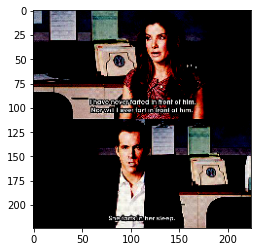

In [8]:
#### Add your code here ####

import matplotlib.pyplot as plt

plt.imshow(X_train[5]);
print(X_train[5])

Print the mask

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


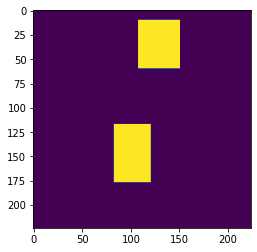

In [9]:
#### Add your code here ####
print(masks[5])
plt.imshow(masks[5])

## Create the model (7 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [79]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model
#model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")
#model.summary()
def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")
    #model.summary()
    for layer in model.layers:
        layer.trainable = trainable
  
    #### Add your code here ####
    block1 = model.get_layer("conv_pw_1_relu").output
    block2 = model.get_layer("conv_pw_3_relu").output
    block3 = model.get_layer("conv_pw_5_relu").output
    block4 = model.get_layer("conv_pw_11_relu").output
    block5 = model.get_layer("conv_pw_13_relu").output
    x = Concatenate()([UpSampling2D()(block5), block4])
    x = Concatenate()([UpSampling2D()(x), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])    
    x = UpSampling2D()(x)
      
     

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function (2 marks)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [68]:
#### Add your code here ####
model = create_model(False)
#model.summary()

### Print model summary (2 marks)

In [69]:
#### Add your code here ####
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_9[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
____________________________________________________________________________________________

### Define dice coefficient function (3 marks)
- Create a function to calculate dice coefficient


In [70]:
#### Add your code here ####
from tensorflow import reduce_sum
from tensorflow.keras.backend import epsilon

def dice_coefficient(y_true, y_pred):
    numerator = 2 * reduce_sum(y_true * y_pred)
    denominator = reduce_sum(y_true + y_pred)
    return numerator / (denominator + epsilon())

### Define loss function (3 marks)

In [71]:
#### Add your code here ####
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.keras.backend.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [72]:
#### Add your code here ####
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

#optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer='adam', metrics=[dice_coefficient])

### Define callbacks (3 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [73]:
#### Add your code here ####
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True, save_weights_only=True)

early_stop = EarlyStopping(monitor="loss", patience=5)

reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1)

### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [74]:
#### Add your code here ####
import tensorflow
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100, batch_size=1, callbacks=[checkpoint, reduce_lr, early_stop] )

(400, 224, 224, 3)
(400, 224, 224)
(9, 224, 224, 3)
(9, 224, 224)
Epoch 1/100
400/400 [==============================] - 25s 58ms/step - loss: 1.5422 - dice_coefficient: 0.4040 - val_loss: 0.8333 - val_dice_coefficient: 0.5504

Epoch 00001: loss improved from inf to 1.17718, saving model to model-1.18.h5
Epoch 2/100
400/400 [==============================] - 22s 56ms/step - loss: 0.8865 - dice_coefficient: 0.5718 - val_loss: 0.8075 - val_dice_coefficient: 0.5579

Epoch 00002: loss improved from 1.17718 to 0.87626, saving model to model-0.88.h5
Epoch 3/100
400/400 [==============================] - 23s 56ms/step - loss: 0.7885 - dice_coefficient: 0.6012 - val_loss: 0.8620 - val_dice_coefficient: 0.5465

Epoch 00003: loss improved from 0.87626 to 0.82839, saving model to model-0.83.h5
Epoch 4/100
400/400 [==============================] - 22s 56ms/step - loss: 0.8074 - dice_coefficient: 0.6135 - val_loss: 0.7918 - val_dice_coefficient: 0.5651

Epoch 00004: loss improved from 0.82839 to 0

### Get the predicted mask for a test image   (3 marks)

Show the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


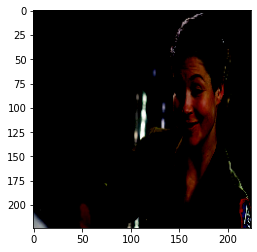

In [80]:
plt.imshow(X_test[5])

Show original mask for test image

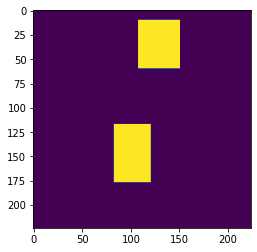

In [81]:
plt.imshow(masks[5])

Predict the mask on the test image

In [82]:
pred_mask = model.predict(x=np.array([X_test[5]]))[0]
print(pred_mask)


[[9.0385449e-11 9.0385449e-11 7.2467199e-11 ... 7.2000586e-14
  9.4233567e-14 9.4233567e-14]
 [9.0385449e-11 9.0385449e-11 7.2467199e-11 ... 7.2000586e-14
  9.4233567e-14 9.4233567e-14]
 [8.7224263e-11 8.7224263e-11 1.1754313e-10 ... 1.2700117e-13
  6.8050180e-14 6.8050180e-14]
 ...
 [1.9868848e-10 1.9868848e-10 2.2166781e-10 ... 1.2315012e-13
  8.4699026e-14 8.4699026e-14]
 [3.3455938e-10 3.3455938e-10 1.9997314e-10 ... 8.1054866e-14
  9.9889728e-14 9.9889728e-14]
 [3.3455938e-10 3.3455938e-10 1.9997314e-10 ... 8.1054866e-14
  9.9889728e-14 9.9889728e-14]]


### Impose the mask on the test image (3 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


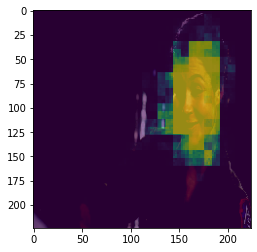

In [83]:
#### Add your code here ####
pred_mask = cv2.resize(pred_mask, (IMAGE_WIDTH, IMAGE_HEIGHT))
plt.imshow(X_test[5])
plt.imshow(pred_mask, alpha=.6)